## Avaliação e Comparação de Modelos

Este notebook tem como objetivo avaliar e comparar modelos de **Machine Learning** aplicados a um problema de **risco de crédito**, utilizando uma base de dados desbalanceada. A análise considera métricas adequadas ao contexto de crédito, com foco na identificação de clientes inadimplentes.

## Estrutura do Notebook

1. Importação das Bibliotecas  
- Bibliotecas para modelagem preditiva  
- Bibliotecas para avaliação de modelos  

2. Leitura dos Dados Pós Feature Engineering  
- Carregamento dos conjuntos de treino e teste processados  
- Conferência da estrutura dos dados  

3. Modelo Baseline — Regressão Logística  
- Treinamento do modelo baseline  
- Geração das predições  
- Avaliação por acurácia  
- Matriz de confusão  
- Relatório de classificação  
- Cálculo da métrica ROC AUC  

4. Modelo Random Forest  
- Treinamento do modelo Random Forest  
- Geração das predições  
- Avaliação por acurácia  
- Matriz de confusão  
- Relatório de classificação  
- Cálculo da métrica ROC AUC  

5. Comparação entre Modelos  
- Definição das métricas de comparação  
- Construção da tabela comparativa  
- Análise de desempenho entre os modelos  

6. Considerações Finais  
- Análise comparativa dos resultados obtidos  
- Trade-off entre performance e interpretabilidade  
- Implicações para aplicações reais de risco de crédito  

## 1. Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt

## 2. Leitura dos dados pós feature engineering

Nesta etapa são carregados os conjuntos de treino e teste gerados no notebook anterior. Essa abordagem garante reprodutibilidade e evita dependência entre notebooks.

In [2]:
import joblib

X_train_fe = joblib.load("../data/processed/X_train_fe.pkl")
X_test_fe = joblib.load("../data/processed/X_test_fe.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

## 3. Modelo baseline – Regressão Logística

A Regressão Logística será utilizada como modelo baseline, por ser simples, interpretável e amplamente usada em problemas de classificação binária, especialmente em risco de crédito.

In [3]:
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr.fit(X_train_fe, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Observação sobre balanceamento de classes

A base de dados apresenta desbalanceamento entre as classes, com maior proporção de clientes adimplentes em relação aos inadimplentes.

Como erros na classificação de inadimplentes possuem maior impacto no contexto de risco de crédito, foi utilizado o parâmetro `class_weight="balanced"`, que ajusta automaticamente os pesos das classes durante o treinamento do modelo.

### Predições

In [4]:
y_pred_lr = lr.predict(X_test_fe)

### Acurácia

In [5]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.7266666666666667

### Matriz de Confusão

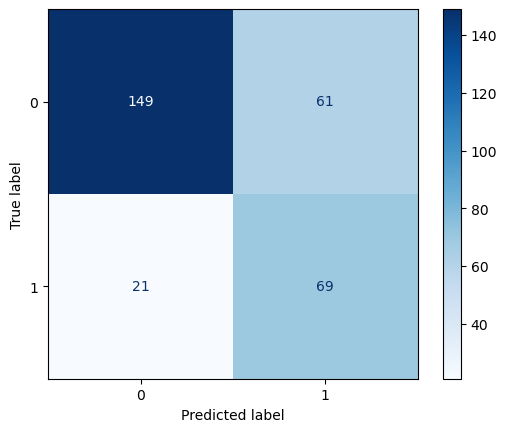

In [6]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    cmap="Blues"
)

### Interpretação da Matriz de Confusão - Logistic Regression

A matriz de confusão abaixo apresenta o desempenho do modelo de **Regressão Logística** na classificação de risco de crédito, considerando a classe **1 como inadimplente (alto risco)** e a classe **0 como adimplente (baixo risco)**.

**Resultados obtidos:**
- **Verdadeiros Negativos (TN): 149**  
  Clientes adimplentes corretamente classificados como baixo risco.
- **Falsos Positivos (FP): 61**  
  Clientes adimplentes classificados incorretamente como alto risco, resultando em recusa indevida de crédito.
- **Falsos Negativos (FN): 21**  
  Clientes inadimplentes classificados como baixo risco — erro mais crítico no contexto de crédito, pois implica risco financeiro direto.
- **Verdadeiros Positivos (TP): 69**  
  Clientes inadimplentes corretamente identificados pelo modelo.

**Análise no contexto de risco de crédito:**

O modelo de Regressão Logística apresentou boa capacidade de identificar clientes inadimplentes, com **maior número de verdadeiros positivos (69)** e **menor quantidade de falsos negativos (21)** quando comparado a abordagens mais conservadoras. Esse comportamento é desejável em cenários de crédito, pois reduz a concessão de crédito a clientes de alto risco.

Por outro lado, o aumento no número de **falsos positivos (61)** indica uma postura mais restritiva do modelo, impactando a aprovação de clientes adimplentes. Esse trade-off é esperado em bases desbalanceadas e pode ser ajustado conforme a política de risco da instituição, por meio da definição de um threshold de decisão mais adequado.

De forma geral, a Regressão Logística demonstrou um bom equilíbrio entre interpretabilidade e desempenho, sendo uma escolha robusta para modelos de risco de crédito, especialmente quando há necessidade de **transparência**, **explicabilidade** e **aderência a práticas regulatórias**.

### Relatório de Classificação

In [7]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       210
           1       0.53      0.77      0.63        90

    accuracy                           0.73       300
   macro avg       0.70      0.74      0.71       300
weighted avg       0.77      0.73      0.74       300



### Classification Report — Logistic Regression

O modelo de Regressão Logística apresentou **acurácia de 0.73**, com bom desempenho na classe **0 (adimplentes)**, atingindo **precision de 0.88** e **recall de 0.71**, indicando boa identificação de clientes de baixo risco.

Para a classe **1 (inadimplentes)**, o modelo obteve **recall de 0.77**, identificando aproximadamente 73% dos clientes inadimplentes, e **precision de 0.52**, refletindo um número maior de falsos positivos. O **F1-score de 0.63** indica um equilíbrio razoável entre precisão e recall para a classe minoritária.

Considerando o **desbalanceamento da base**, os resultados mostram que o modelo prioriza a identificação de inadimplentes, reduzindo o risco de concessão de crédito a clientes de alto risco, sendo uma abordagem adequada para cenários de crédito que exigem **maior sensibilidade à classe minoritária**.

### ROC AUC

In [8]:
y_proba_lr = lr.predict_proba(X_test_fe)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

roc_auc_lr

np.float64(0.8023280423280423)

O valor de ROC AUC igual a **0.802** indica que o modelo possui boa capacidade de discriminação entre clientes adimplentes e inadimplentes. 

Isso significa que, ao selecionar aleatoriamente um cliente inadimplente e um adimplente, o modelo atribui uma probabilidade maior de inadiplência ao cliente correto em aproximadamente 80% das vezes.

Por ser uma métrica independente do limiar de decisão, o ROC AUC é especialmente adequado para problemas de risco de crédito, nos quais diferentes thresholds podem ser avaliados conforme a estratégia de negócio.

## 4. Modelo Random Forest

In [9]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_fe, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)

O modelo Random Forest foi treinado utilizando o conjunto de dados após feature engineering. O parâmetro `class_weight="balanced"` foi utilizado para lidar com o desbalanceamento entre as classes, priorizando a correta identificação de clientes inadimplentes.

### Predições

In [10]:
y_pred_rf = rf.predict(X_test_fe)

Nesta etapa, foram geradas as predições do modelo Random Forest para o conjunto de teste.

### Acurácia

In [11]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.7466666666666667

O modelo Random Forest obteve **acurácia de 0.75**, indicando que 75% das previsões foram classificadas corretamente.  
Por se tratar de um problema de **risco de crédito com base desbalanceada**, a acurácia foi utilizada apenas como métrica complementar, sendo a avaliação do modelo focada principalmente em métricas mais sensíveis à classe inadimplente, como **ROC AUC**, **recall** e **matriz de confusão**.

### Matriz de Confusão

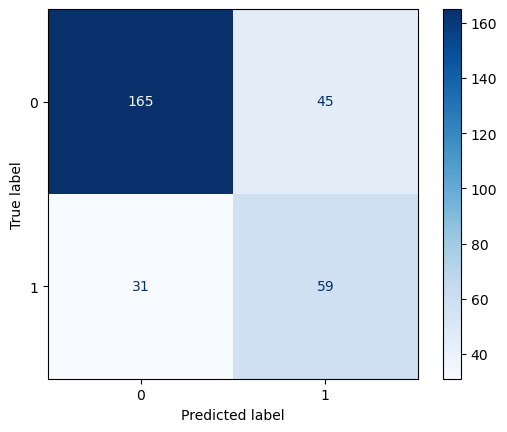

In [12]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    cmap="Blues"
)

### Interpretação da Matriz de Confusão - Random Forest

A matriz de confusão abaixo apresenta o desempenho do modelo Random Forest na classificação de risco de crédito, considerando a classe **1 como inadimplente (alto risco)** e a classe **0 como adimplente (baixo risco)**.

**Resultados obtidos:**
- **Verdadeiros Negativos (TN): 165**  
  Clientes adimplentes corretamente classificados como baixo risco.
- **Falsos Positivos (FP): 45**  
  Clientes adimplentes classificados incorretamente como alto risco, o que pode gerar perda de oportunidade de concessão de crédito.
- **Falsos Negativos (FN): 31**  
  Clientes inadimplentes classificados como baixo risco — cenário mais crítico, pois representa risco financeiro direto.
- **Verdadeiros Positivos (TP): 59**  
  Clientes inadimplentes corretamente identificados pelo modelo.

**Análise no contexto de risco de crédito:**

O modelo apresenta boa capacidade de identificar clientes inadimplentes, com um número maior de verdadeiros positivos em relação aos falsos negativos. Ainda assim, os **31 falsos negativos** indicam casos em que o modelo concederia crédito a clientes de alto risco, o que representa potencial prejuízo financeiro.

Por outro lado, os **45 falsos positivos** refletem uma postura mais conservadora do modelo, recusando crédito a alguns clientes bons. Em cenários de crédito, esse trade-off é geralmente aceitável quando o objetivo é **reduzir perdas financeiras associadas à inadimplência**.

De forma geral, o Random Forest demonstra um equilíbrio consistente entre identificação de risco e preservação da carteira, podendo ter seu desempenho aprimorado com **ajuste de threshold**, **ponderação de custos** ou **engenharia de atributos**, de acordo com a política de risco da instituição.

### Relatório de Classificação

In [13]:
y_pred_rf = rf.predict(X_test_fe)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       210
           1       0.57      0.66      0.61        90

    accuracy                           0.75       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.76      0.75      0.75       300



O modelo Random Forest apresentou **acurácia de 0.75**, com bom desempenho na classe **0 (adimplentes)**, atingindo **precision de 0.84** e **recall de 0.79**, indicando boa identificação de clientes de baixo risco.

Para a classe **1 (inadimplentes)**, o modelo obteve **recall de 0.66**, identificando aproximadamente 66% dos clientes inadimplentes, e **precision de 0.57**, refletindo um número moderado de falsos positivos. O **F1-score de 0.61** indica um equilíbrio razoável entre precisão e recall para a classe minoritária.

Considerando o **desbalanceamento da base**, os resultados mostram que o modelo consegue identificar uma parcela relevante dos inadimplentes, sendo adequado para análises de risco quando combinado com ajuste de threshold e métricas focadas no impacto financeiro.

### ROC AUC

In [14]:
y_prob_rf = rf.predict_proba(X_test_fe)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_rf

np.float64(0.7868253968253968)

O modelo Random Forest obteve **ROC AUC de 0.786**, indicando **boa capacidade de discriminação** entre clientes adimplentes e inadimplentes. Esse resultado significa que, em aproximadamente **79% das comparações**, o modelo atribui uma probabilidade maior de inadimplência a um cliente de maior risco do que a um cliente de menor risco.

Para um problema de **risco de crédito com base desbalanceada**, esse valor representa um desempenho consistente, mostrando que o modelo é capaz de ranquear adequadamente os clientes por nível de risco.

## 5. Comparação entre Modelos

### Métrica utilizada para comparação

Para a comparação entre os modelos, foi utilizada a métrica ROC AUC, pois ela avalia a capacidade de separação entre clientes adimplentes e inadimplentes com base nas probabilidades previstas, sendo independente do limiar de decisão.

Essa característica torna o ROC AUC especialmente adequado para problemas de risco de crédito, nos quais diferentes thresholds podem ser adotados conforme a estratégia de negócio.

### Tabela comparativa dos modelos

In [15]:
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Random Forest"],
    "ROC_AUC": [roc_auc_lr, roc_auc_rf]
})

resultados

,Modelo,ROC_AUC
0,Logistic Regression,0.802328
1,Random Forest,0.786825


A comparação dos modelos com base na métrica ROC AUC indica que a Regressão Logística apresentou desempenho ligeiramente superior ao Random Forest.

Com ROC AUC de **0.802**, a Regressão Logística demonstrou melhor capacidade de separação entre clientes adimplentes e inadimplentes em relação ao Random Forest, que obteve ROC AUC de **0.787**.

Esse resultado sugere que, para este conjunto de dados, um modelo mais simples e interpretável foi suficiente para capturar os padrões relevantes do problema de risco de crédito.

## 6. Considerações finais

A Regressão Logística apresentou desempenho consistente e interpretável, servindo como um bom modelo baseline para o problema de risco de crédito.
O Random Forest apresentou melhora no desempenho preditivo, indicando a capacidade de capturar relações não lineares entre as variáveis.

Para aplicações reais, a escolha do modelo deve considerar não apenas métricas de performance, mas também interpretabilidade e impacto no negócio.